In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 10})
conn = sqlite3.connect("lahman2014.sqlite")

# PART ONE: Data Wrangling 

In [2]:
winning_df = pd.read_sql_query("select Teams.teamID, Teams.W as Wins, Teams.G as Games, \
(CAST(Teams.W AS float) / CAST(Teams.G AS float)) * 100 as winningPercentage, sum(Salaries.salary) as totalPayroll \
from Teams INNER JOIN Salaries ON Teams.teamID = Salaries.teamID GROUP BY Salaries.teamID;", conn)
winning_df

,teamID,Wins,Games,winningPercentage,totalPayroll
0,ANA,84,162,51.851852,3.744736e+09
1,ARI,65,162,40.123457,2.056958e+10
2,ATL,85,163,52.147239,9.226439e+10
3,BAL,54,154,35.064935,9.944220e+10
4,BOS,79,138,57.246377,2.773279e+11
5,CAL,75,162,46.296296,8.703326e+09
6,CHA,83,137,60.583942,1.937846e+11
7,CHN,52,66,78.787879,2.585168e+11
8,CIN,77,134,57.462687,1.793469e+11
9,CLE,54,138,39.130435,1.601718e+11


#### missing data
we dealt with the missing data by using INNER JOIN between(Salaries, Teams) Tables,
so we include only teams which had at least one row at Salaries table

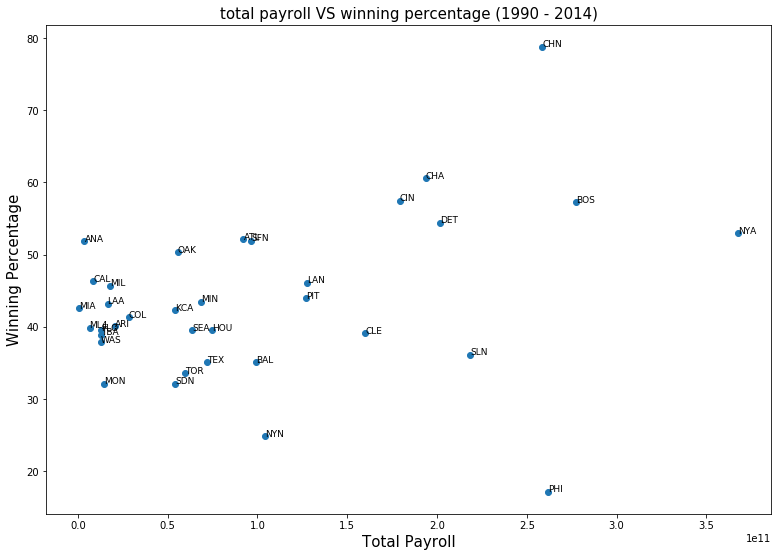

In [3]:
winning_fig, winning_ax = plt.subplots(1,1, figsize=(13,9))
winning_ax.plot(winning_df['totalPayroll'], winning_df['winningPercentage'],'o')
winning_ax.set_xlabel('Total Payroll', fontsize = 15)
winning_ax.set_ylabel('Winning Percentage', fontsize = 15)
winning_ax.set_title('total payroll VS winning percentage (1990 - 2014)', fontsize = 15)
for i in range(len(winning_df['teamID'])) :
    winning_ax.annotate(winning_df['teamID'][i], (winning_df['totalPayroll'][i], winning_df['winningPercentage'][i]), fontsize = 9)


# PART TWO: Exploratory Data Analysis

## Payroll distribution 

In [4]:
teams_years_df = pd.read_sql_query("select Salaries.yearID, Teams.teamID, (CAST(Teams.W AS float) / CAST(Teams.G AS float)) * 100 \
as winningPercentage, sum(Salaries.salary) as totalPayroll from Teams INNER JOIN Salaries ON Teams.teamID = Salaries.teamID \
AND Teams.yearID = Salaries.yearID where Salaries.yearID >= 1990 AND Teams.yearID >= 1990 GROUP BY Salaries.teamID, Salaries.yearID order by Salaries.teamID;", conn)
teams_years_df

,yearID,teamID,winningPercentage,totalPayroll
0,1997,ANA,51.851852,31135472.0
1,1998,ANA,52.469136,41281000.0
2,1999,ANA,43.209877,55388166.0
3,2000,ANA,50.617284,51464167.0
4,2001,ANA,46.296296,47535167.0
...,...,...,...,...
723,2010,WAS,42.592593,61400000.0
724,2011,WAS,49.689441,63856928.0
725,2012,WAS,60.493827,80855143.0
726,2013,WAS,53.086420,113703270.0


In [5]:
teams_years_df['teamID'].nunique()

35

In [6]:
max_paroll = teams_years_df.loc[teams_years_df['totalPayroll'].idxmax()]
max_paroll['totalPayroll']

231978886.0

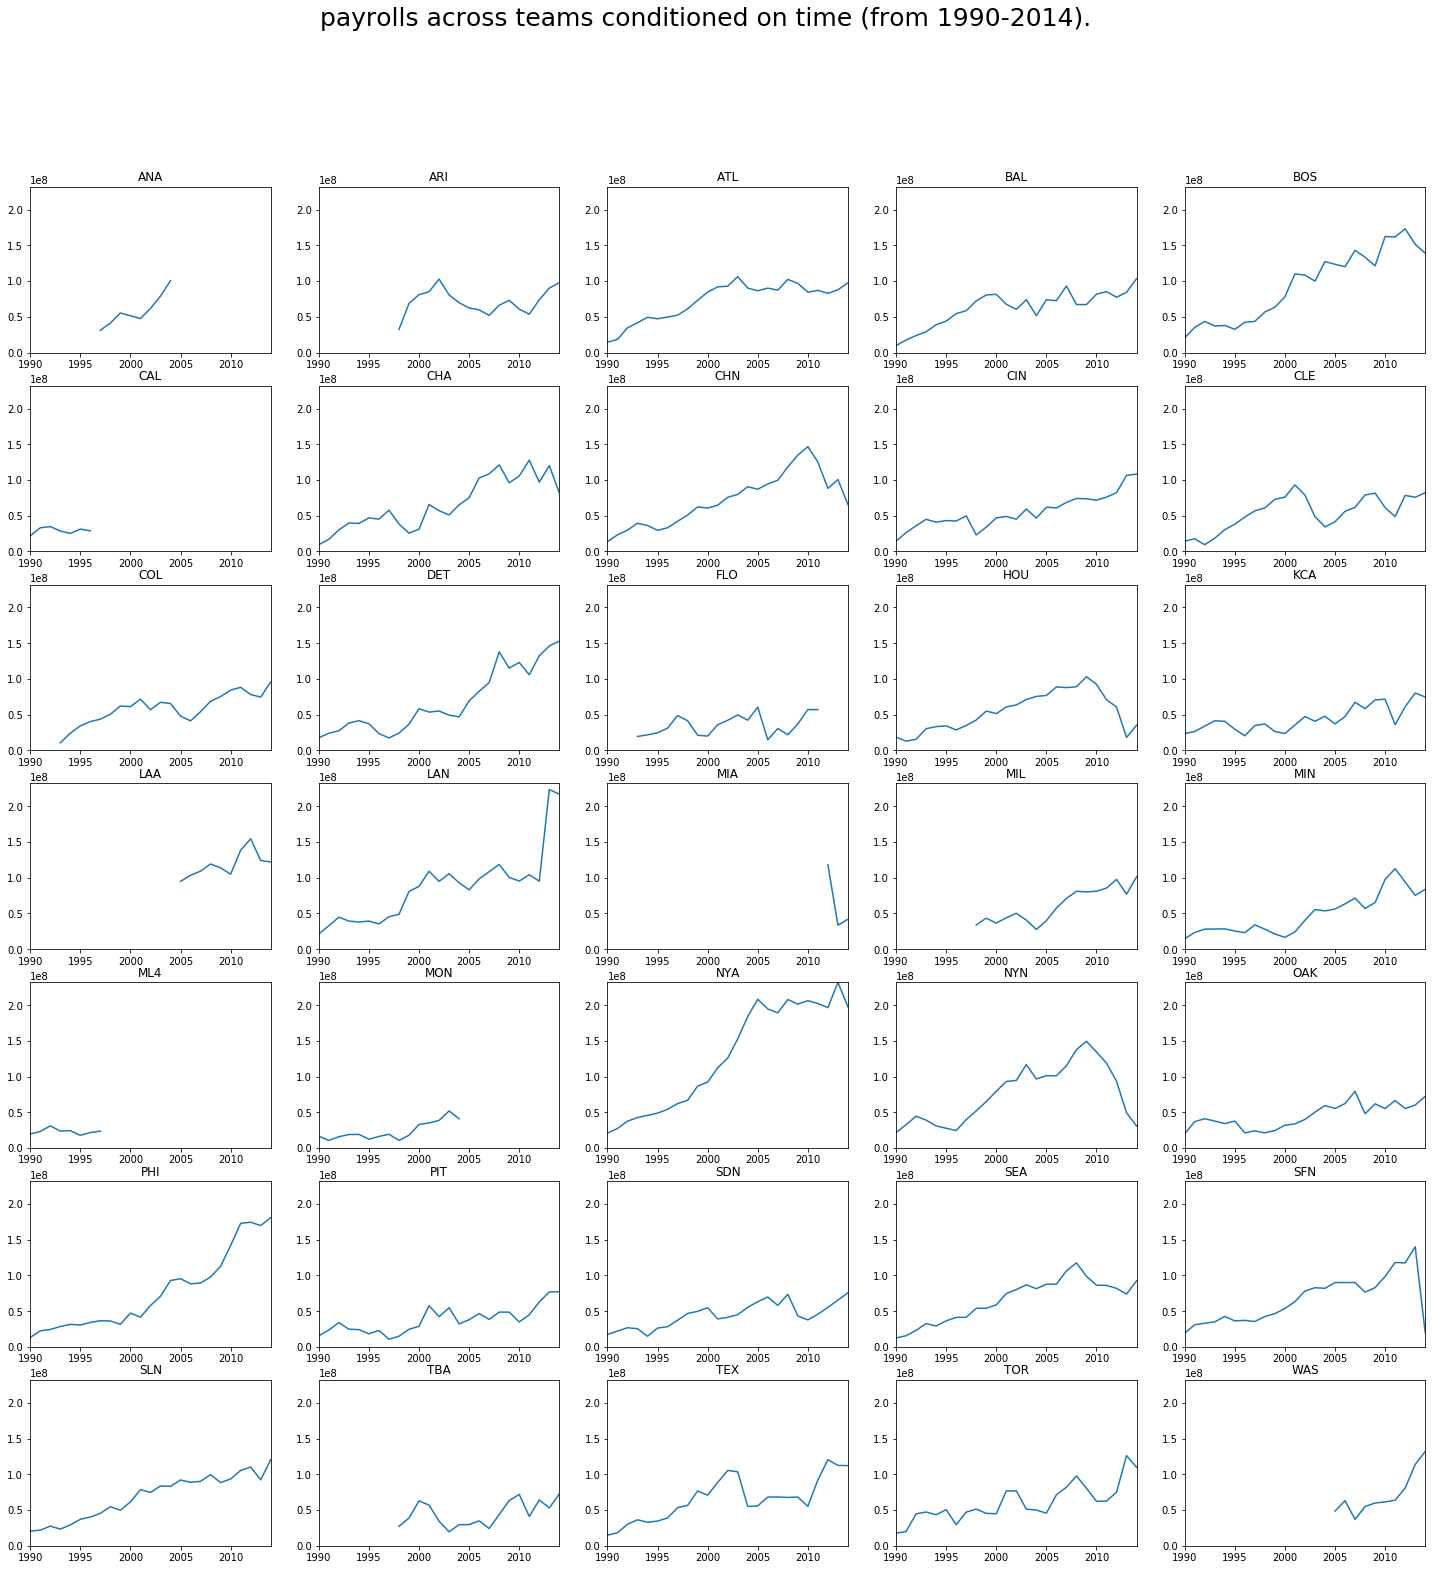

In [7]:
distribution_fig, distribution_ax = plt.subplots(nrows = 7, ncols = 5, figsize=(25, 25))
distribution_fig.suptitle('payrolls across teams conditioned on time (from 1990-2014).', fontsize = 25)
teams = teams_years_df['teamID'].unique().tolist()
teams_df_dict = {}
i = 0
for row in distribution_ax:
    for col in row:
        cur_team_df = teams_years_df[teams_years_df['teamID'] == teams[i]]
        teams_df_dict[teams[i]] = cur_team_df

        cur_team_years = teams_years_df[teams_years_df['teamID'] == teams[i]]['yearID']
        cur_team_payrolls = teams_years_df[teams_years_df['teamID'] == teams[i]]['totalPayroll']
        
        col.set_xlim([1990, 2014])
        col.set_ylim([0, max_paroll['totalPayroll']])

        col.plot(cur_team_years, cur_team_payrolls)
        col.title.set_text(teams[i])
        i += 1

#### Comment on the distribution of payrolls
plots shows that the payrolls in the most of teams are increasing over time, so we can say that the central tendency(mean) increasing over time.

#### Evidence for the provided statement

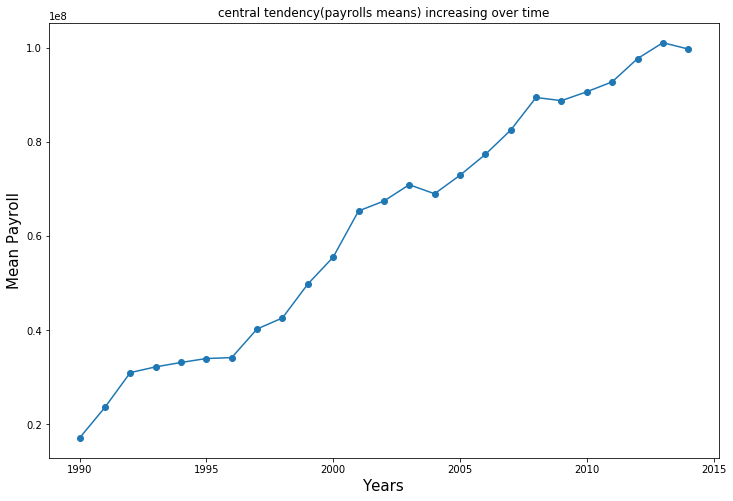

In [8]:
years = []
years_means = []
for year in range(1990, 2015):
    years.append(year)
    years_means.append(teams_years_df[teams_years_df['yearID'] == year]['totalPayroll'].mean())

    
evidence_fig, evidence_ax = plt.subplots(1,1, figsize=(12,8))
evidence_ax.plot(years, years_means, '-o')
evidence_ax.set_xlabel('Years', fontsize = 15)
evidence_ax.set_ylabel('Mean Payroll', fontsize = 15)
evidence_ax.title.set_text('central tendency(payrolls means) increasing over time')


## Correlation between payroll and winning percentage

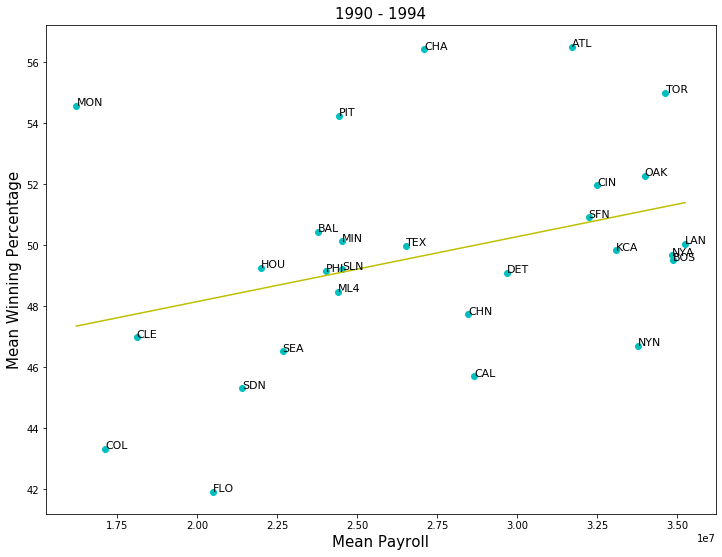

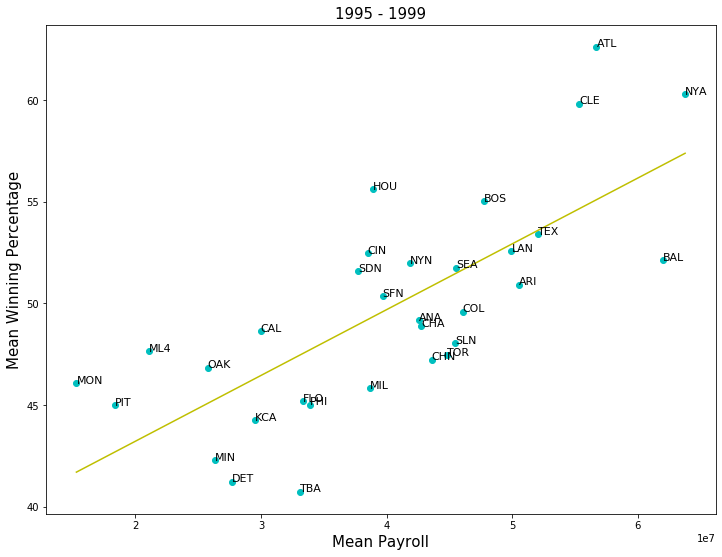

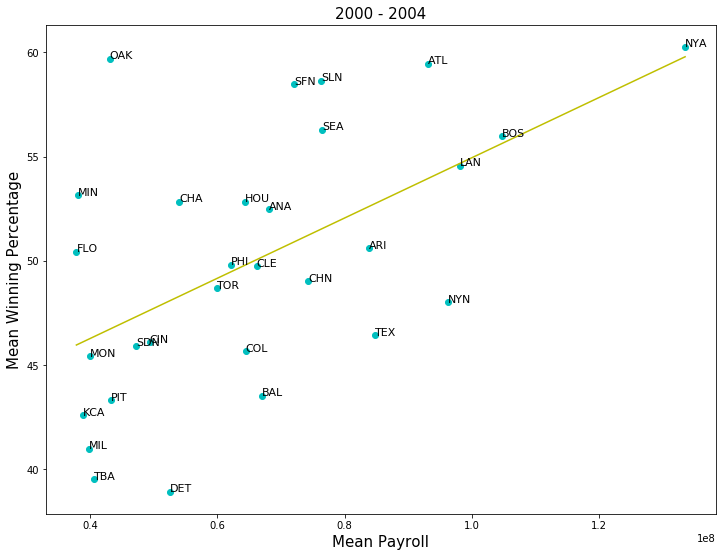

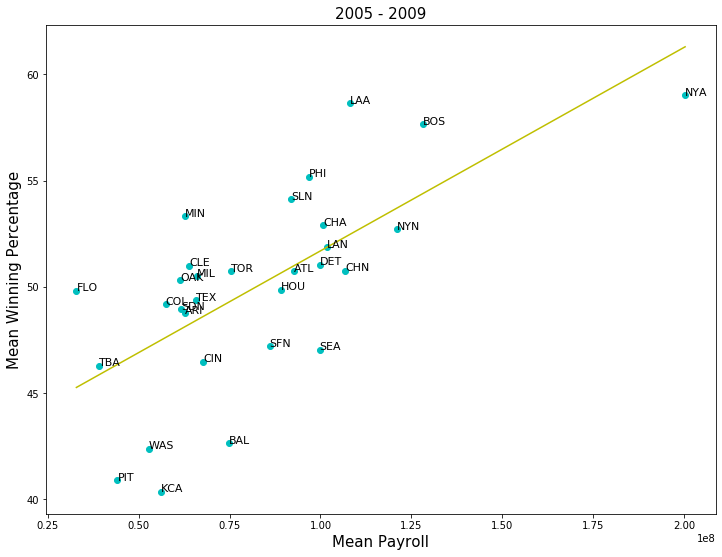

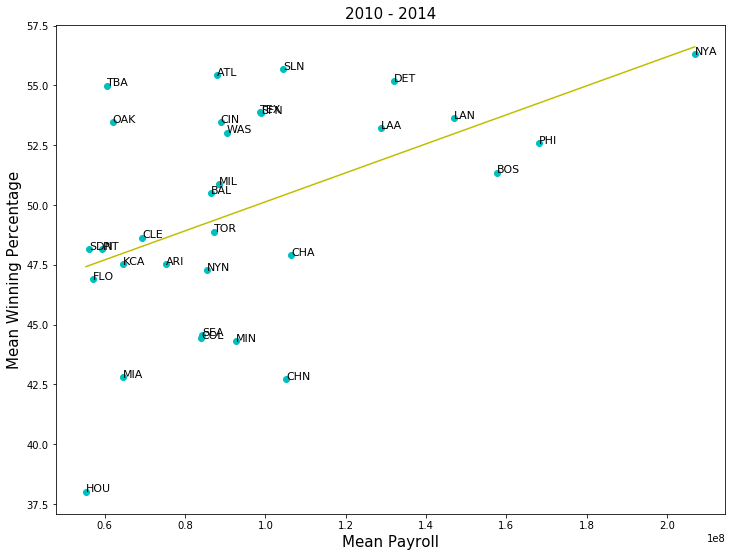

In [9]:
periods = [1990, 1995, 2000, 2005, 2010]
periods_dict = {}
for period in periods:
    periods_dict[period] = teams_years_df[(teams_years_df['yearID'] >= period) & (teams_years_df['yearID'] <= period + 4)]
    
for period in periods:
    
    period_fig, period_ax = plt.subplots(1,1, figsize=(12, 9))
    payroll_mean = periods_dict[period].groupby('teamID', as_index=False)['totalPayroll'].mean()
    winning_mean = periods_dict[period].groupby('teamID', as_index=False)['winningPercentage'].mean()
    x = payroll_mean['totalPayroll']
    y = winning_mean['winningPercentage']
    period_ax.plot(x, y,'o', color ='c')
    period_ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'y')

    period_ax.set_xlabel('Mean Payroll', fontsize = 15)
    period_ax.set_ylabel('Mean Winning Percentage', fontsize = 15)

    period_ax.set_title(str(period) + " - " + str(period + 4), fontsize = 15)

    for i in range(len(payroll_mean)):
        period_ax.annotate(payroll_mean['teamID'][i], (payroll_mean['totalPayroll'][i], winning_mean['winningPercentage'][i]), fontsize = 11)

#### Comment on the team payrolls across these periods
- best fit lines in all periods show the positive correlation between payroll and winning percentage(winning percentage increases as payroll increases)
- by looking at x-axis labels. the plots show that the payrolls increasing over time (from 1e7 to 1e8).


#### Are there any teams that stand out as being particularly good at paying for wins across these periods?
- ATL always located above (best fit line) which means it wins more than expected for it.

#### What can you say about the Oakland A's spending efficiency across these periods
- OAK always located at the left right corner of the plot (above the best fit line) which means it pays less than the other teams and wins more than the other teams.

# PART THREE: Data Transformations 

## Standardizing across years

In [10]:
avg_payroll = {}
standard_deviation = {}

for year in range(1990, 2015):
    avg_payroll[year] = teams_years_df[(teams_years_df['yearID'] == year)]['totalPayroll'].mean()
    standard_deviation[year] = teams_years_df[(teams_years_df['yearID'] == year)]['totalPayroll'].std()

for i, row in teams_years_df.iterrows():
    if(row['yearID'] < 1990):
        teams_years_df.set_value(i,'standardizedPayroll', np.NaN)
        continue
    avg_payrollj = avg_payroll[row['yearID']]
    standard_deviationj = standard_deviation[row['yearID']]
    
    teams_years_df.set_value(i,'standardizedPayroll', (row['totalPayroll'] - avg_payrollj) / standard_deviationj)


teams_years_df

,yearID,teamID,winningPercentage,totalPayroll,standardizedPayroll
0,1997,ANA,51.851852,31135472.0,-0.698639
1,1998,ANA,52.469136,41281000.0,-0.086369
2,1999,ANA,43.209877,55388166.0,0.271410
3,2000,ANA,50.617284,51464167.0,-0.190214
4,2001,ANA,46.296296,47535167.0,-0.721244
...,...,...,...,...,...
723,2010,WAS,42.592593,61400000.0,-0.769040
724,2011,WAS,49.689441,63856928.0,-0.709594
725,2012,WAS,60.493827,80855143.0,-0.459099
726,2013,WAS,53.086420,113703270.0,0.257062


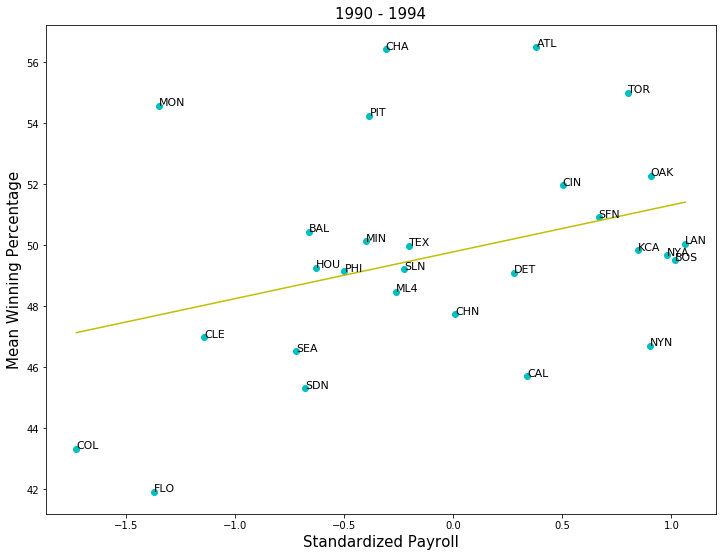

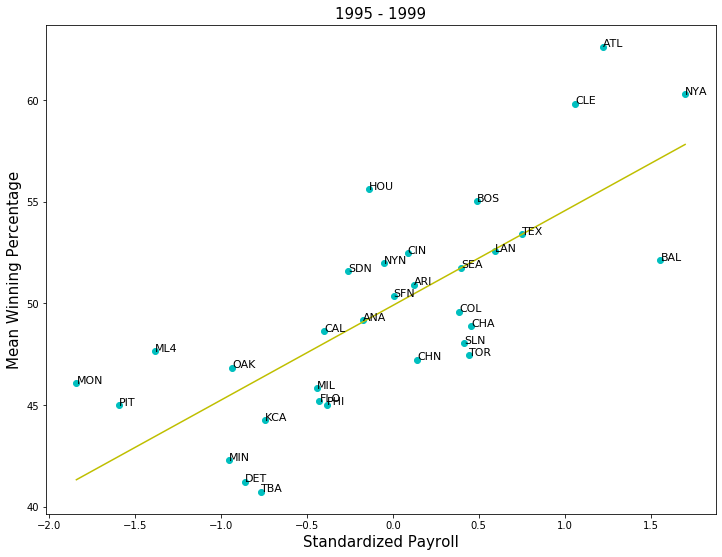

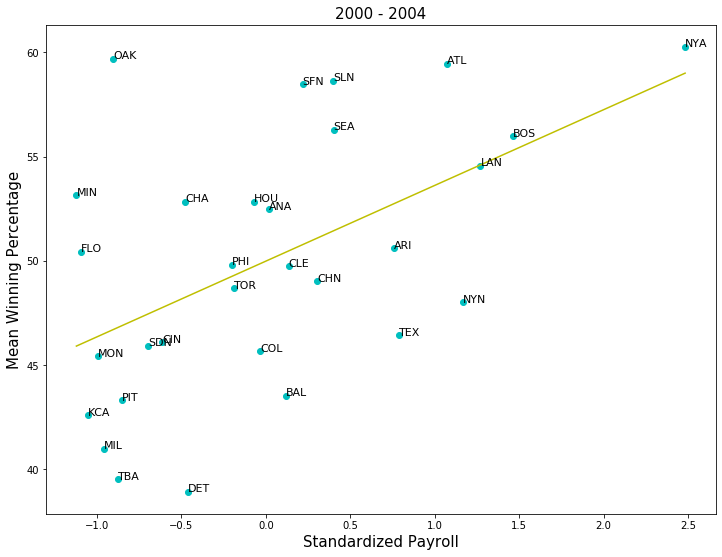

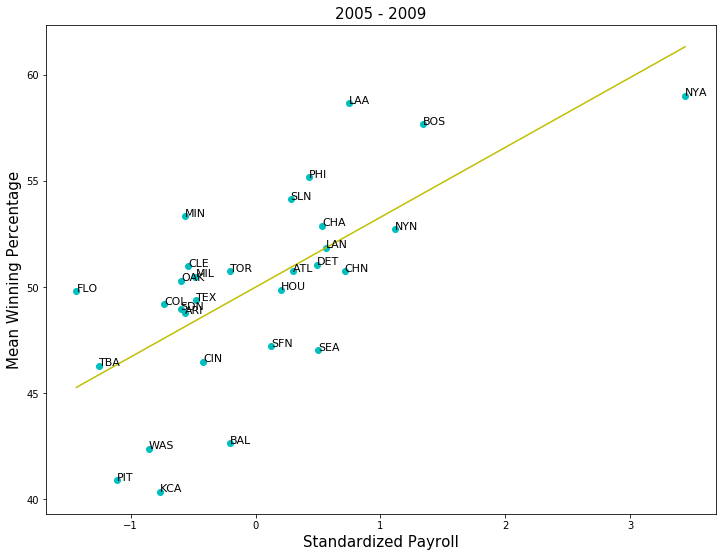

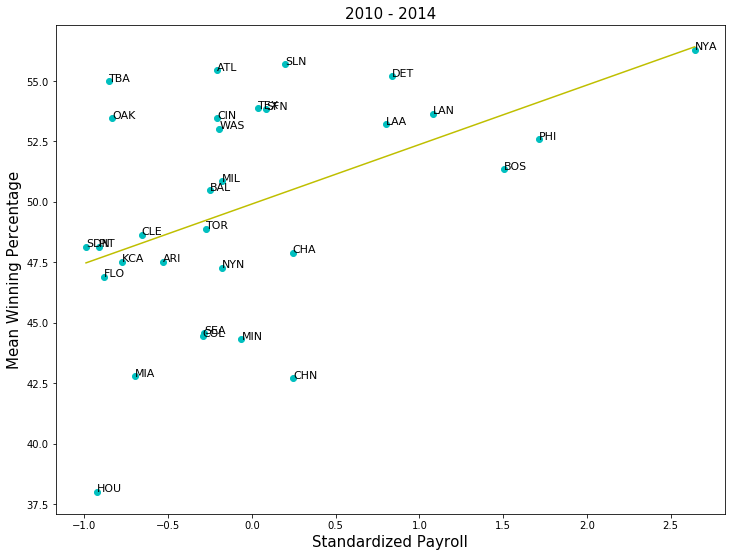

In [11]:

periods = [1990, 1995, 2000, 2005, 2010]
standardized_periods_dict = {}
for period in periods:
    standardized_periods_dict[period] = teams_years_df[(teams_years_df['yearID'] >= period) & (teams_years_df['yearID'] <= period + 4)]
    
for period in periods:
    
    standardized_period_fig, standardized_period_ax = plt.subplots(1,1, figsize=(12, 9))
    standardized_payroll_mean = standardized_periods_dict[period].groupby('teamID', as_index=False)['standardizedPayroll'].mean()
    standardized_winning_mean = standardized_periods_dict[period].groupby('teamID', as_index=False)['winningPercentage'].mean()
    standardized_payroll_mean.dropna(inplace=True)
    standardized_winning_mean.dropna(inplace=True)
    x = standardized_payroll_mean['standardizedPayroll']
    y = standardized_winning_mean['winningPercentage']

    standardized_period_ax.plot(x, y,'o', color ='c')
    standardized_period_ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'y')

    standardized_period_ax.set_xlabel('Standardized Payroll', fontsize = 15)
    standardized_period_ax.set_ylabel('Mean Winning Percentage', fontsize = 15)

    standardized_period_ax.set_title(str(period) + " - " + str(period + 4), fontsize = 15)

    for i in range(len(standardized_payroll_mean)):
        standardized_period_ax.annotate(standardized_payroll_mean['teamID'][i], (standardized_payroll_mean['standardizedPayroll'][i], standardized_winning_mean['winningPercentage'][i]), fontsize = 11)

#### Discuss the relationship with respect to the graph before the data transformation

Now we can compare any team with eac|h other team because they are all in the same scale after standardization, and we can evaluate the winning percentage based on payroll (mean of the payrolls is located at 0)
- best fit lines in all periods show the positive correlation between payroll and winning percentage(winning percentage increases as payroll increases)

## Expected wins

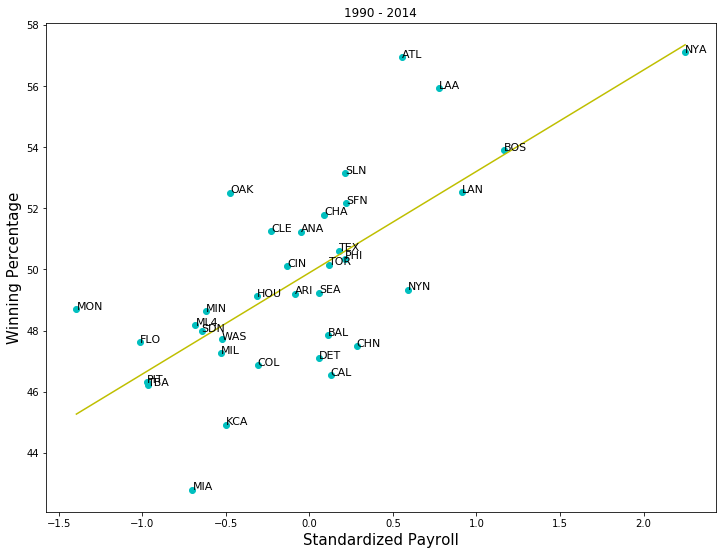

In [12]:
allyears_fig, allyears_ax = plt.subplots(1,1, figsize=(12, 9))
allyears_payroll_mean = teams_years_df.groupby('teamID', as_index=False)['standardizedPayroll'].mean()
allyears_winning_mean = teams_years_df.groupby('teamID', as_index=False)['winningPercentage'].mean()
x = allyears_payroll_mean['standardizedPayroll']
y = allyears_winning_mean['winningPercentage']
allyears_ax.plot(x, y,'o', color ='c')
allyears_ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'y')

allyears_ax.set_xlabel('Standardized Payroll', fontsize = 15)
allyears_ax.set_ylabel('Winning Percentage', fontsize = 15)
allyears_ax.set_title("1990 - 2014")

for i in range(len(allyears_payroll_mean)):
    allyears_ax.annotate(allyears_payroll_mean['teamID'][i], (allyears_payroll_mean['standardizedPayroll'][i], allyears_winning_mean['winningPercentage'][i]), fontsize = 11)

In [13]:
teams_years_df['expectedWinningPercentage'] = 50 + 2.5*teams_years_df['standardizedPayroll']
teams_years_df

,yearID,teamID,winningPercentage,totalPayroll,standardizedPayroll,expectedWinningPercentage
0,1997,ANA,51.851852,31135472.0,-0.698639,48.253402
1,1998,ANA,52.469136,41281000.0,-0.086369,49.784077
2,1999,ANA,43.209877,55388166.0,0.271410,50.678524
3,2000,ANA,50.617284,51464167.0,-0.190214,49.524464
4,2001,ANA,46.296296,47535167.0,-0.721244,48.196891
...,...,...,...,...,...,...
723,2010,WAS,42.592593,61400000.0,-0.769040,48.077399
724,2011,WAS,49.689441,63856928.0,-0.709594,48.226016
725,2012,WAS,60.493827,80855143.0,-0.459099,48.852252
726,2013,WAS,53.086420,113703270.0,0.257062,50.642655


## Spending efficiency

In [14]:
teams_years_df['spendingEfficiency'] = teams_years_df['winningPercentage'] - teams_years_df['expectedWinningPercentage']
teams_years_df

,yearID,teamID,winningPercentage,totalPayroll,standardizedPayroll,expectedWinningPercentage,spendingEfficiency
0,1997,ANA,51.851852,31135472.0,-0.698639,48.253402,3.598450
1,1998,ANA,52.469136,41281000.0,-0.086369,49.784077,2.685059
2,1999,ANA,43.209877,55388166.0,0.271410,50.678524,-7.468647
3,2000,ANA,50.617284,51464167.0,-0.190214,49.524464,1.092820
4,2001,ANA,46.296296,47535167.0,-0.721244,48.196891,-1.900595
...,...,...,...,...,...,...,...
723,2010,WAS,42.592593,61400000.0,-0.769040,48.077399,-5.484807
724,2011,WAS,49.689441,63856928.0,-0.709594,48.226016,1.463425
725,2012,WAS,60.493827,80855143.0,-0.459099,48.852252,11.641575
726,2013,WAS,53.086420,113703270.0,0.257062,50.642655,2.443765


In [15]:
min_efficiendy = teams_years_df.loc[teams_years_df['spendingEfficiency'].idxmin()]['spendingEfficiency']
max_efficiendy = teams_years_df.loc[teams_years_df['spendingEfficiency'].idxmax()]['spendingEfficiency']

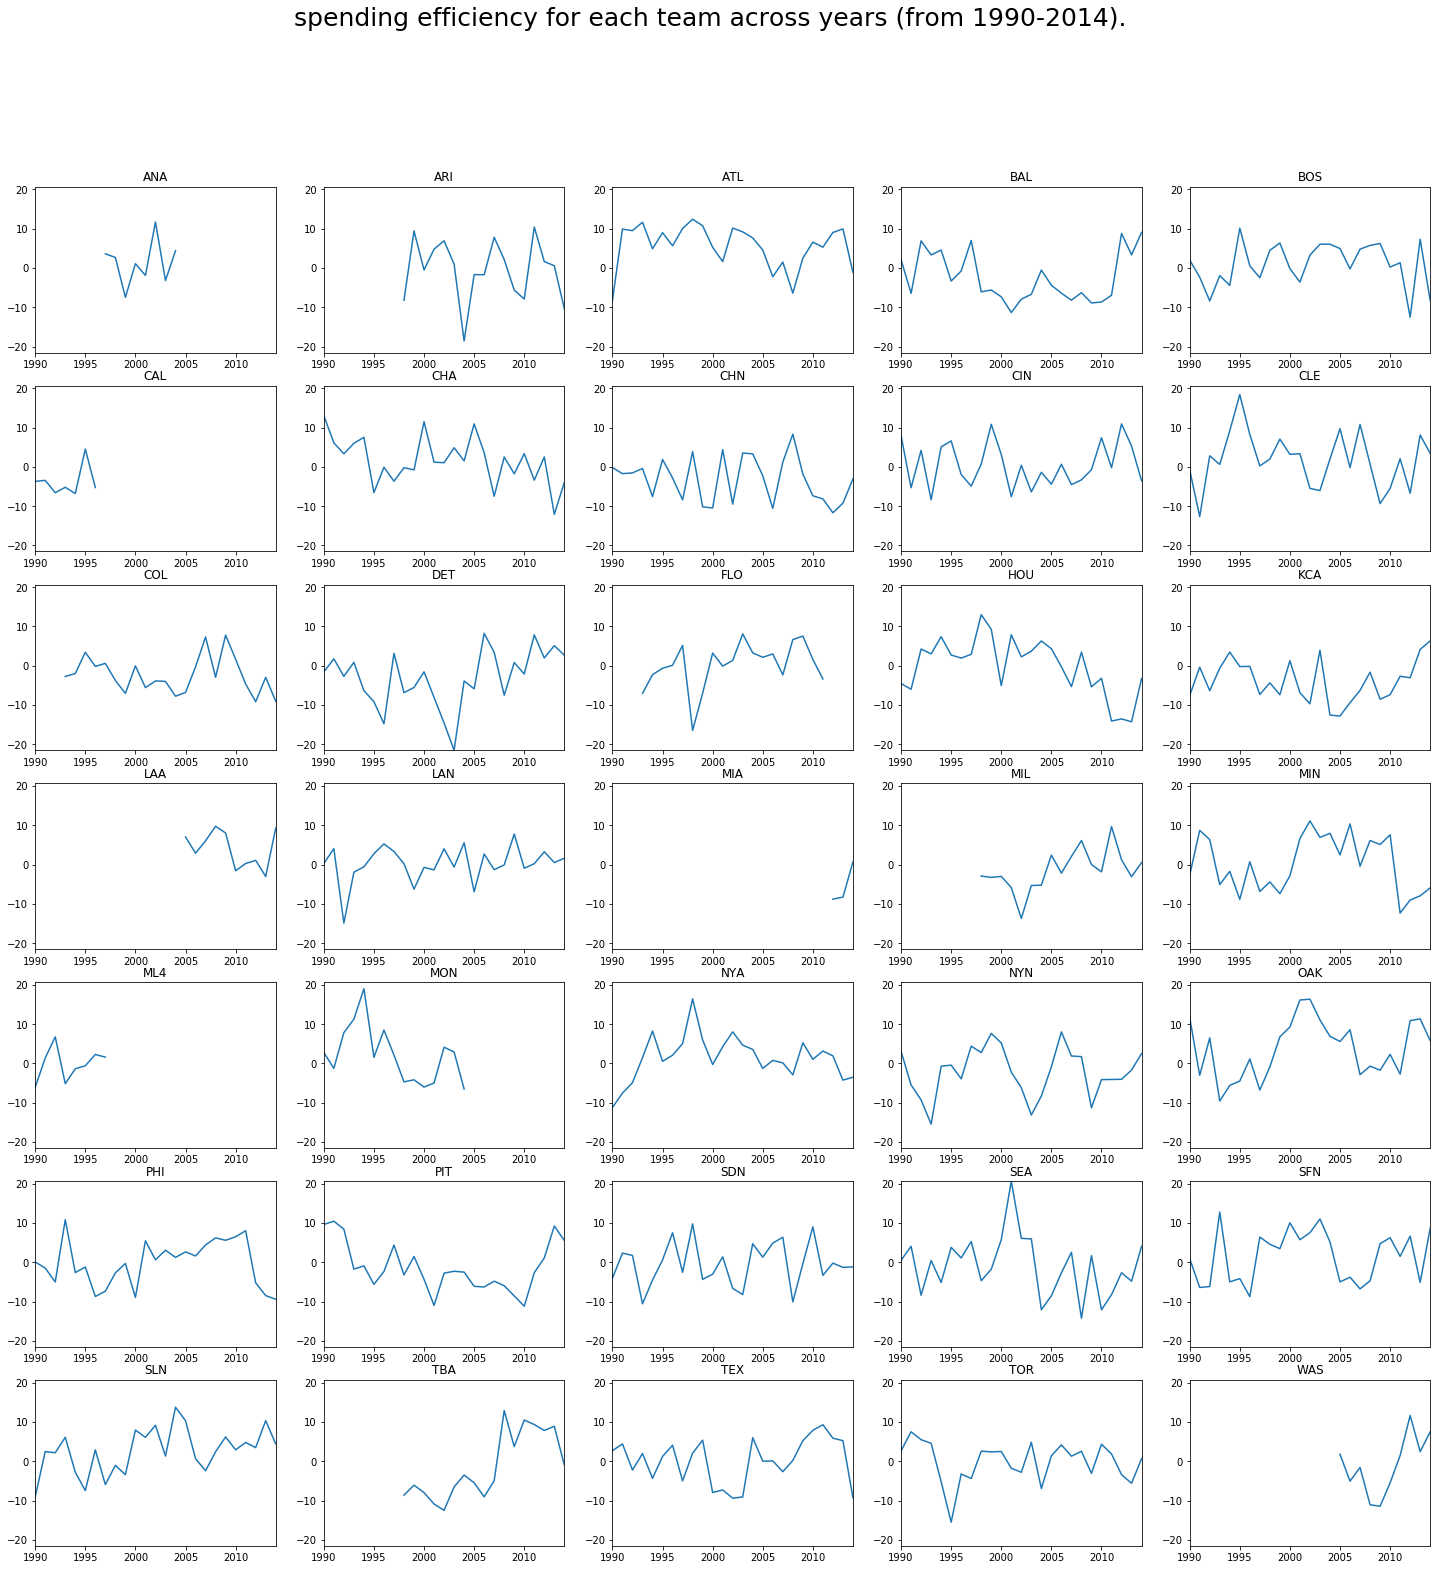

In [16]:
efficiency_fig, efficiency_ax = plt.subplots(nrows = 7, ncols = 5, figsize=(25, 25))
efficiency_fig.suptitle('spending efficiency for each team across years (from 1990-2014).', fontsize = 25)

teams = teams_years_df['teamID'].unique().tolist()
i = 0
for row in efficiency_ax:
    for col in row:
        cur_team_years = teams_years_df[teams_years_df['teamID'] == teams[i]]['yearID']
        cur_team_efficiency = teams_years_df[teams_years_df['teamID'] == teams[i]]['spendingEfficiency']
        col.set_xlim([1990, 2014])
        col.set_ylim([min_efficiendy, max_efficiendy])

        col.plot(cur_team_years, cur_team_efficiency)
        col.title.set_text(teams[i])
        i += 1

Text(0.5, 1.0, 'Spending Efficiency across teams(1990 - 2014)')

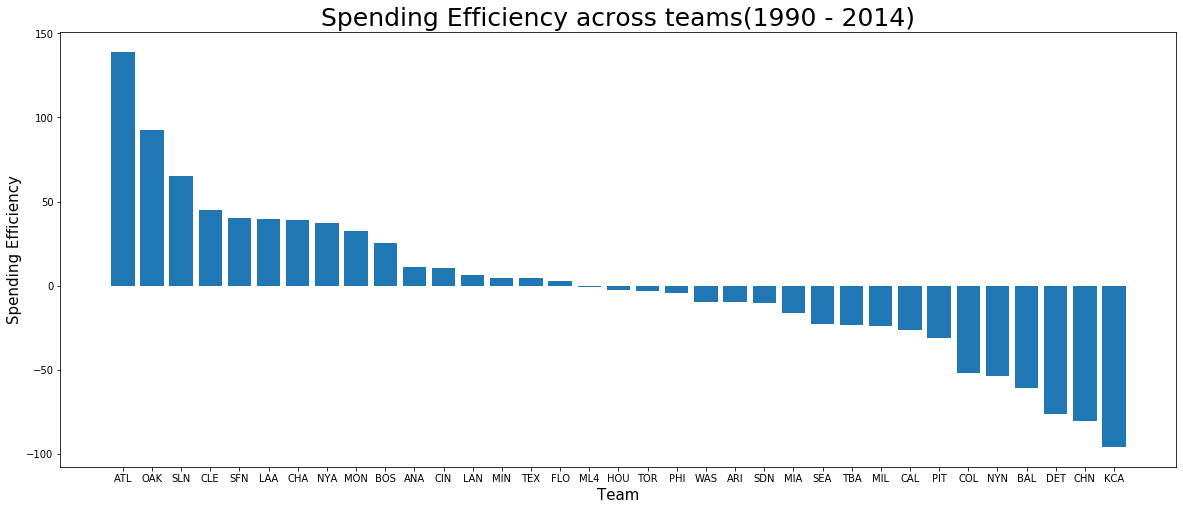

In [17]:
teams = teams_years_df['teamID'].unique().tolist()
teams_efficiency = []

for i in range(len(teams)):
    cur_team_efficiency = teams_years_df[(teams_years_df['teamID'] == teams[i])]['spendingEfficiency'].sum()
    teams_efficiency.append(cur_team_efficiency)
    
teams_efficiency, teams = zip(*sorted(zip(teams_efficiency, teams), reverse = True))
teamseEffieciency_fig, teamseEffieciency_ax = plt.subplots(1,1, figsize=(20,8))
teamseEffieciency_ax.set_xlabel('Team', fontsize = 15)
teamseEffieciency_ax.set_ylabel('Spending Efficiency', fontsize = 15)
teamseEffieciency_ax.bar(teams, teams_efficiency)

teamseEffieciency_ax.set_title('Spending Efficiency across teams(1990 - 2014)', fontsize = 25)


Text(0.5, 1.0, 'Spending Efficiency across teams(2000 - 2005)')

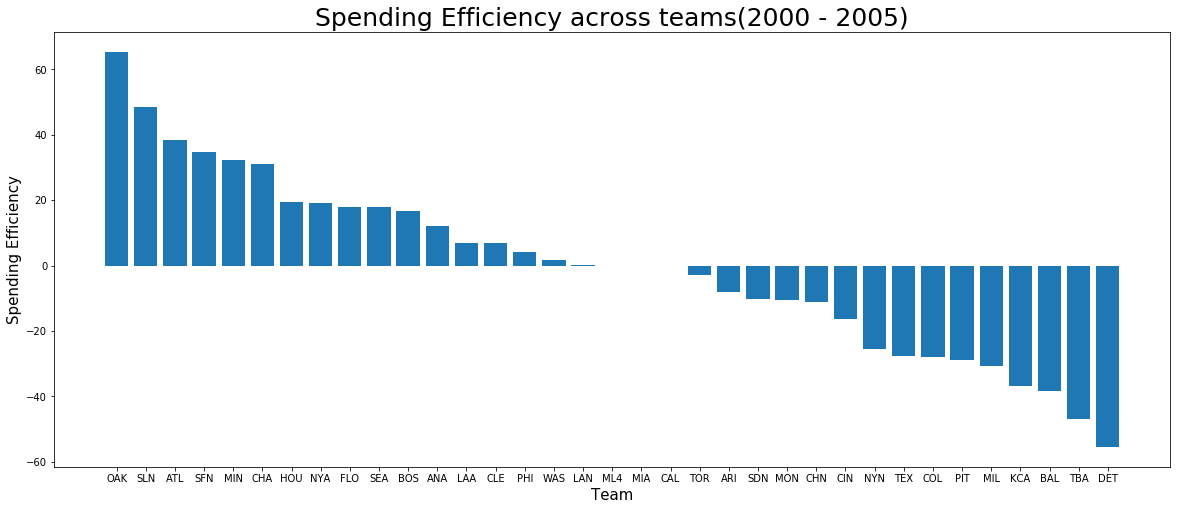

In [18]:
teams = teams_years_df['teamID'].unique().tolist()
teams_efficiency = []

for i in range(len(teams)):
    cur_team_efficiency = teams_years_df[(teams_years_df['teamID'] == teams[i]) & (teams_years_df['yearID'] >= 2000) & (teams_years_df['yearID'] <= 2005)]['spendingEfficiency'].sum()
    teams_efficiency.append(cur_team_efficiency)
    
teams_efficiency, teams = zip(*sorted(zip(teams_efficiency, teams), reverse = True))
teamseEffieciency_fig, teamseEffieciency_ax = plt.subplots(1,1, figsize=(20,8))
teamseEffieciency_ax.set_xlabel('Team', fontsize = 15)
teamseEffieciency_ax.set_ylabel('Spending Efficiency', fontsize = 15)
teamseEffieciency_ax.bar(teams, teams_efficiency)

teamseEffieciency_ax.set_title('Spending Efficiency across teams(2000 - 2005)', fontsize = 25)


#### How good was Oakland's efficiency during the Moneyball period?
The plots show that Oakland is ranked second in spending efficiency in the period(1990 - 2014), while it is ranked first in the period (2000-2005).

In the period(2000-2005) plots show that Oakland team was winning more than expected for it based on payrolls. in this period Oakland was paying less than the other teams and winning more than the other teams.